[Link del Repositorio de Github de la Tarea 09 - Joel Quilumba](https://github.com/iamjoel01/tarea09_metodos_numericos)

‎   
‎   
‎   
‎   
‎   
‎   
‎   
‎   

# CONJUNTO DE EJERCICIOS

## Pregunta 1
**Para cada uno de los siguientes sistemas lineales, obtenga, de ser posible, una solución con métodos gráficos. 
Explique los resultados desde un punto de vista geométrico.**

a. $x_{1}+2x_{2}=0$  
‎$x_{1}-x_{2}=0$

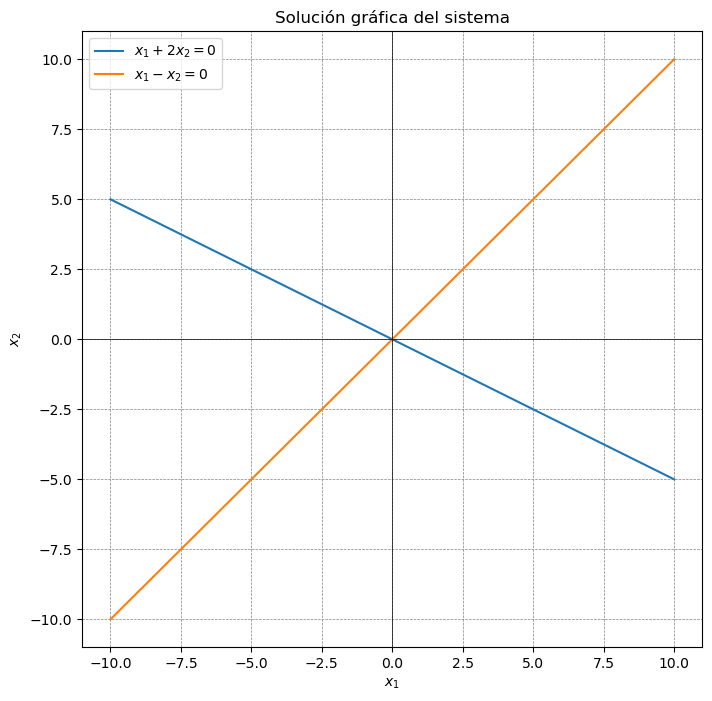

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Definimos las funciones de las rectas
def f1(x):
    return -x / 2

def f2(x):
    return x

# Valores de x
x = np.linspace(-10, 10, 400)

# Graficamos
plt.figure(figsize=(8, 8))
plt.plot(x, f1(x), label='$x_1 + 2x_2 = 0$')
plt.plot(x, f2(x), label='$x_1 - x_2 = 0$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Solución gráfica del sistema')
plt.show()


b. $x_{1}+2x_{2}=3$  
‎$-2x_{1}-4x_{2}=6$

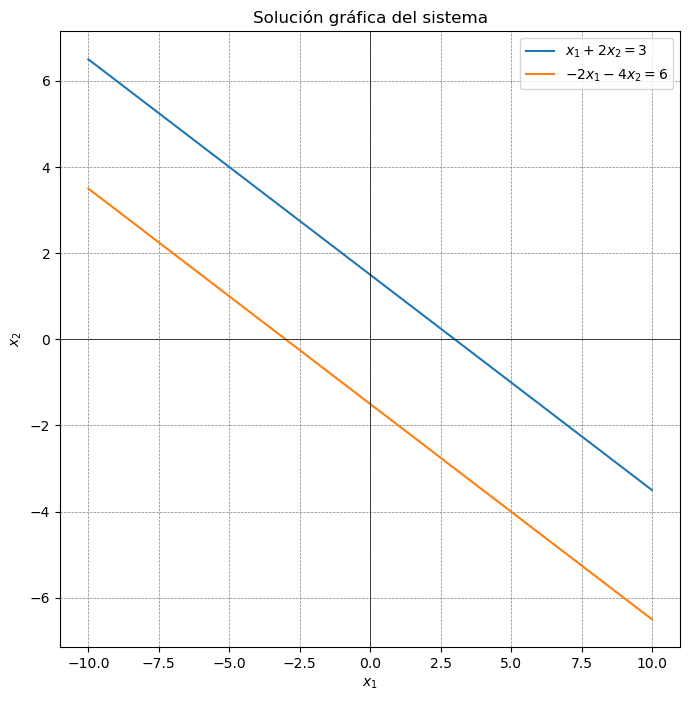

In [8]:
# Definimos las funciones de las rectas
def f3(x):
    return (3 - x) / 2

def f4(x):
    return (-6 - 2 * x) / 4

# Graficamos
plt.figure(figsize=(8, 8))
plt.plot(x, f3(x), label='$x_1 + 2x_2 = 3$')
plt.plot(x, f4(x), label='$-2x_1 - 4x_2 = 6$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Solución gráfica del sistema')
plt.show()

c. $2x_{1}+x_{2}=-1$  
‎$x_{1}+x_{2}=2$  
‎$x_{1}-3x_{2}=5$

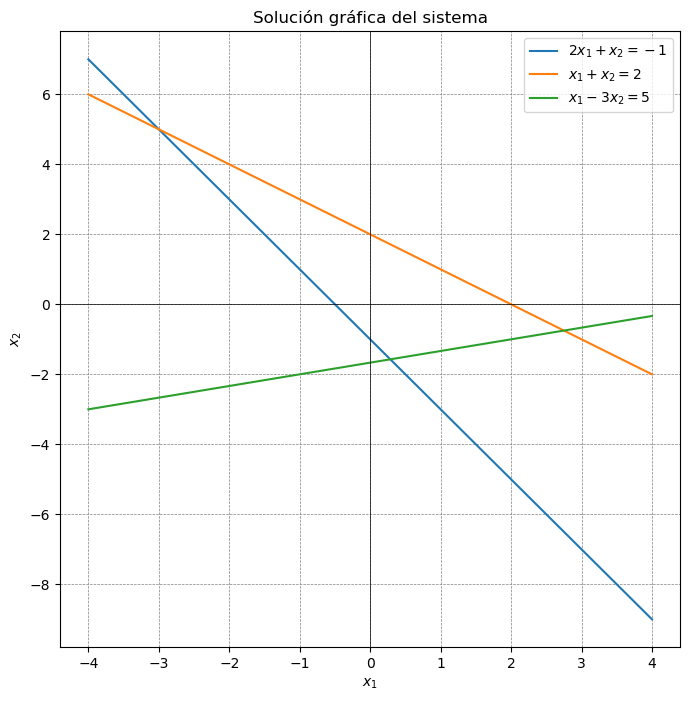

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos las funciones de las rectas
def f1(x):
    return -1 - 2 * x

def f2(x):
    return 2 - x

def f3(x):
    return (x - 5) / 3

# Valores de x
x = np.linspace(-4, 4, 400)

# Graficamos
plt.figure(figsize=(8, 8))
plt.plot(x, f1(x), label='$2x_1 + x_2 = -1$')
plt.plot(x, f2(x), label='$x_1 + x_2 = 2$')
plt.plot(x, f3(x), label='$x_1 - 3x_2 = 5$')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Solución gráfica del sistema')
plt.show()

d. $2x_{1}+x_{2}+x_{3}=1$  
$2x_{1}+4x_{2}-x_{3}=-1$ 

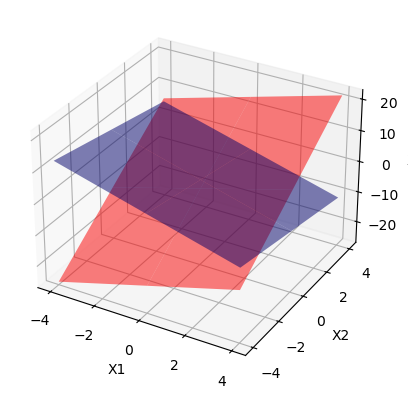

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definimos las ecuaciones del sistema
def plane1(x1, x2):
    return 1 - 2*x1 - x2

def plane2(x1, x2):
    return (2 - 2*x1 - 4*x2) / -1

# Creamos una malla para los valores de x1 y x2
x1 = np.linspace(-4, 4, 200)
x2 = np.linspace(-4, 4, 200)
x1, x2 = np.meshgrid(x1, x2)

# Calculamos los valores de x3 para cada plano
x3_plane1 = plane1(x1, x2)
x3_plane2 = plane2(x1, x2)

# Creamos la figura y el eje 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficamos los planos
ax.plot_surface(x1, x2, x3_plane1, color='blue', alpha=0.5, rstride=100, cstride=100)
ax.plot_surface(x1, x2, x3_plane2, color='red', alpha=0.5, rstride=100, cstride=100)

# Configuramos las etiquetas de los ejes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

# Mostramos la gráfica
plt.show()


## Pregunta 2
**Utilice la eliminación gaussiana con sustitución hacia atrás y aritmética de redondeo de dos dígitos para resolver los siguientes sistemas lineales. No reordene las ecuaciones. (La solución exacta para cada sistema es $x_{1}=−1$, $x_{2}=2$, $x_{3}=3$)**

In [11]:
def gauss_elimination_with_rounding(A, b):
    n = len(A)
    M = A
    
    for i in range(n):
        M[i] = [round(elem, 2) for elem in M[i]]
        b[i] = round(b[i], 2)

    for k in range(n):
        for i in range(k+1, n):
            if M[i][k] != 0.0:
                lam = round(M[i][k] / M[k][k], 2)
                M[i] = [round(M[i][j] - lam * M[k][j], 2) for j in range(n)]
                b[i] = round(b[i] - lam * b[k], 2)
    
    x = [0 for i in range(n)]
    for i in range(n-1, -1, -1):
        s = sum(M[i][j] * x[j] for j in range(i, n))
        x[i] = round((b[i] - s) / M[i][i], 2)
    return x

a. $-x_{1}+4x_{2}+x_{3}=8$   
$\frac{5}{3}x_{1}+\frac{2}{3}x_{2}+\frac{2}{3}x_{3}=1$   
$2x_{1}+x_{2}+4x_{3}=11$   

In [12]:
A_a = [
    [-1, 4, 1],
    [5/3, 2/3, 2/3],
    [2, 1, 4]
]
b_a = [8, 1, 11]
solution_a = gauss_elimination_with_rounding(A_a, b_a)
print("Solución del sistema a:", solution_a)

Solución del sistema a: [-0.99, 1.0, 3.01]


b. $4x_{1}+2x_{2}-x_{3}=-5$   
$\frac{1}{9}x_{1}+\frac{1}{9}x_{2}-\frac{1}{3}x_{3}=-1$   
$x_{1}+4x_{2}+2x_{3}=9$   

In [13]:
A_b = [
    [4, 2, -1],
    [1/9, 1/9, -1/3],
    [1, 4, 2]
]
b_b = [-5, -1, 9]
solution_b = gauss_elimination_with_rounding(A_b, b_b)
print("Solución del sistema b:", solution_b)


Solución del sistema b: [-1.0, 1.0, 3.0]


## Pregunta 3
**Utilice el algoritmo de eliminación gaussiana para resolver, de ser posible, los siguientes sistemas lineales, y 
determine si se necesitan intercambios de fila:**

In [14]:
import logging
from sys import stdout
from datetime import datetime

logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(datetime.now())

import numpy as np

def eliminacion_gaussiana(A: np.ndarray) -> np.ndarray:
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(
            A, dtype=float
        )  # convertir en float, porque si no, convierte en enteros
    assert A.shape[0] == A.shape[1] - 1, "La matriz A debe ser de tamaño n-by-(n+1)."
    n = A.shape[0]
    n_adds = 0
    n_mults = 0
    intercambios = []
    for i in range(0, n - 1):  # loop por columna

        # --- encontrar pivote
        p = None  # default, first element
        for pi in range(i, n):
            if A[pi, i] == 0:
                # must be nonzero
                continue

            if p is None:
                # first nonzero element
                p = pi
                continue

            if abs(A[pi, i]) < abs(A[p, i]):
                p = pi

        if p is None:
            # no pivot found.
            logging.info(f"\n{A}")
            raise ValueError("No existe solución única.")

        if p != i:
            logging.info(f"Intercambiando filas {i} y {p}.")
            # swap rows
            _aux = A[i, :].copy()
            A[i, :] = A[p, :].copy()
            A[p, :] = _aux
            intercambios.append((i, p))

        # --- Eliminación: loop por fila
        for j in range(i + 1, n):
            m = A[j, i] / A[i, i]
            A[j, i:] = A[j, i:] - m * A[i, i:]
            n_mults += 1 + (n + 1 - i - 1)
            n_adds += n + 1 - i - 1

        logging.info(f"\n{A}")

    if A[n - 1, n - 1] == 0:
        # Sin embargo, esto solo se accede al finalizar la matriz... Con todos los pivotes
        if A[n - 1, n] == 0:
            raise ValueError("Infinitas soluciones.")
        else:
            raise ValueError("Sin solución.")

    # --- Sustitución hacia atrás
    solucion = np.zeros(n)
    solucion[n - 1] = A[n - 1, n] / A[n - 1, n - 1]

    n_mults += 1

    for i in range(n - 2, -1, -1):
        suma = 0
        n_adds -= 1
        for j in range(i + 1, n):
            suma += A[i, j] * solucion[j]
            n_mults += 1
            n_adds += 1
        solucion[i] = (A[i, n] - suma) / A[i, i]
        n_adds += 1
        n_mults += 1

    return solucion, n_adds, n_mults, intercambios

[07-23 20:43:51][INFO] 2024-07-23 20:43:51.892355


a. $x_{1}-x_{2}+3x_{3}=2$   
$3x_{1}-3x_{2}+x_{3}=-1$   
$x_{1}+x_{2}‎‎ ‎ ‎  ‎ ‎ ‎ =3$  

In [15]:
if __name__ == "__main__":
    A = np.array([
        [1,-1,3,2],[3,-3,1,-1],[1,1,0,3]], dtype=float)

    print("Matriz original:")
    print(A)
    print("\nSolución por eliminación gaussiana:")
    solucion, n_adds, n_mults, intercambios = eliminacion_gaussiana(A.copy())
    print("Solución:", solucion)
    print("Sumas:", n_adds)
    print("Multiplicaciones:", n_mults)
    print("Intercambios de filas:", intercambios)

Matriz original:
[[ 1. -1.  3.  2.]
 [ 3. -3.  1. -1.]
 [ 1.  1.  0.  3.]]

Solución por eliminación gaussiana:
[07-23 20:44:03][INFO] 
[[ 1. -1.  3.  2.]
 [ 0.  0. -8. -7.]
 [ 0.  2. -3.  1.]]
[07-23 20:44:03][INFO] Intercambiando filas 1 y 2.
[07-23 20:44:03][INFO] 
[[ 1. -1.  3.  2.]
 [ 0.  2. -3.  1.]
 [ 0.  0. -8. -7.]]
Solución: [1.1875 1.8125 0.875 ]
Sumas: 11
Multiplicaciones: 17
Intercambios de filas: [(1, 2)]


b. $2x_{1}-1.5x_{2}+3x_{3}=1$   
$-x_{1}+‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ 2x_{3}=3$   
$4x_{1}-4.5x_{2}+5x_{3}=1$  

In [16]:
if __name__ == "__main__":
    A = np.array([
        [2,-1.5,3,1],[-1,0,2,3],[4,-4.5,5,1]], dtype=float)

    print("Matriz original:")
    print(A)
    print("\nSolución por eliminación gaussiana:")
    solucion, n_adds, n_mults, intercambios = eliminacion_gaussiana(A.copy())
    print("Solución:", solucion)
    print("Sumas:", n_adds)
    print("Multiplicaciones:", n_mults)
    print("Intercambios de filas:", intercambios)

Matriz original:
[[ 2.  -1.5  3.   1. ]
 [-1.   0.   2.   3. ]
 [ 4.  -4.5  5.   1. ]]

Solución por eliminación gaussiana:
[07-23 20:44:25][INFO] Intercambiando filas 0 y 1.
[07-23 20:44:25][INFO] 
[[-1.   0.   2.   3. ]
 [ 0.  -1.5  7.   7. ]
 [ 0.  -4.5 13.  13. ]]
[07-23 20:44:25][INFO] 
[[-1.   0.   2.   3. ]
 [ 0.  -1.5  7.   7. ]
 [ 0.   0.  -8.  -8. ]]
Solución: [-1. -0.  1.]
Sumas: 11
Multiplicaciones: 17
Intercambios de filas: [(0, 1)]


c. $2x_{1}‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ =3$   
$x_{1}+1.5‎x_{2} ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ =4.5$   
$‎ ‎ ‎ ‎ ‎ ‎ -3x_{2}+0.5x_{3}‎ ‎ =-6.6$  
$2x_{1}-2x_{2}+x_{3}+x_{4}=0.8$ 

In [17]:
if __name__ == "__main__":
    A = np.array([
        [2,0,0,0,3],[1,1.5,0,0,4.5],[0,-3,0.5,0,-6.6],[2,-2,1,1,0.8]], dtype=float)

    print("Matriz original:")
    print(A)
    print("\nSolución por eliminación gaussiana:")
    solucion, n_adds, n_mults, intercambios = eliminacion_gaussiana(A.copy())
    print("Solución:", solucion)
    print("Sumas:", n_adds)
    print("Multiplicaciones:", n_mults)
    print("Intercambios de filas:", intercambios)

Matriz original:
[[ 2.   0.   0.   0.   3. ]
 [ 1.   1.5  0.   0.   4.5]
 [ 0.  -3.   0.5  0.  -6.6]
 [ 2.  -2.   1.   1.   0.8]]

Solución por eliminación gaussiana:
[07-23 20:44:35][INFO] Intercambiando filas 0 y 1.
[07-23 20:44:35][INFO] 
[[ 1.   1.5  0.   0.   4.5]
 [ 0.  -3.   0.   0.  -6. ]
 [ 0.  -3.   0.5  0.  -6.6]
 [ 0.  -5.   1.   1.  -8.2]]
[07-23 20:44:35][INFO] 
[[ 1.   1.5  0.   0.   4.5]
 [ 0.  -3.   0.   0.  -6. ]
 [ 0.   0.   0.5  0.  -0.6]
 [ 0.   0.   1.   1.   1.8]]
[07-23 20:44:35][INFO] 
[[ 1.   1.5  0.   0.   4.5]
 [ 0.  -3.   0.   0.  -6. ]
 [ 0.   0.   0.5  0.  -0.6]
 [ 0.   0.   0.   1.   3. ]]
Solución: [ 1.5  2.  -1.2  3. ]
Sumas: 26
Multiplicaciones: 36
Intercambios de filas: [(0, 1)]


d. $x_{1}+x_{2}‎ ‎ ‎ ‎ ‎ ‎ ‎ +x_{4}=2$   
$2x_{1}+‎x_{2}-x_{3}+x_{4}=1$   
$‎4x_{1}-x_{2}-2x_{3}+2x_{4}=0$  
$3x_{1}-x_{2}-x_{3}+2x_{4}=-3$ 

In [18]:
if __name__ == "__main__":
    A = np.array([
        [1,1,0,1,2],[2,1,-1,1,1],[4,-1,-2,2,0],[3,-1,-1,2,-3]], dtype=float)

    print("Matriz original:")
    print(A)
    print("\nSolución por eliminación gaussiana:")
    solucion, n_adds, n_mults, intercambios = eliminacion_gaussiana(A.copy())
    print("Solución:", solucion)
    print("Sumas:", n_adds)
    print("Multiplicaciones:", n_mults)
    print("Intercambios de filas:", intercambios)

Matriz original:
[[ 1.  1.  0.  1.  2.]
 [ 2.  1. -1.  1.  1.]
 [ 4. -1. -2.  2.  0.]
 [ 3. -1. -1.  2. -3.]]

Solución por eliminación gaussiana:
[07-23 20:44:51][INFO] 
[[ 1.  1.  0.  1.  2.]
 [ 0. -1. -1. -1. -3.]
 [ 0. -5. -2. -2. -8.]
 [ 0. -4. -1. -1. -9.]]
[07-23 20:44:51][INFO] 
[[ 1.  1.  0.  1.  2.]
 [ 0. -1. -1. -1. -3.]
 [ 0.  0.  3.  3.  7.]
 [ 0.  0.  3.  3.  3.]]
[07-23 20:44:51][INFO] 
[[ 1.  1.  0.  1.  2.]
 [ 0. -1. -1. -1. -3.]
 [ 0.  0.  3.  3.  7.]
 [ 0.  0.  0.  0. -4.]]


ValueError: Sin solución.

## Pregunta 4
**Use el algoritmo de eliminación gaussiana y la aritmética computacional de precisión de 32 bits para resolver los 
siguientes sistemas lineales.**

In [25]:
import numpy as np

def gaussian_elimination(A, b):
    # Convertimos a matrices de numpy con precisión de 32 bits
    A = np.array(A, dtype=np.float32)
    b = np.array(b, dtype=np.float32)
    
    n = len(b)
    
    # Eliminación hacia adelante
    for k in range(n):
        # Buscamos el pivote
        max_row = np.argmax(abs(A[k:n, k])) + k
        if A[max_row, k] == 0:
            raise ValueError("El sistema no tiene solución única.")
        # Intercambiamos filas
        A[[k, max_row]] = A[[max_row, k]]
        b[[k, max_row]] = b[[max_row, k]]
        
        # Eliminación de las filas inferiores
        for i in range(k + 1, n):
            factor = A[i, k] / A[k, k]
            A[i, k:] -= factor * A[k, k:]
            b[i] -= factor * b[k]
    
    # Sustitución hacia atrás
    x = np.zeros_like(b)
    for i in range(n - 1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i + 1:], x[i + 1:])) / A[i, i]
    
    return x


a. $\frac{1}{4}x_{1}+\frac{1}{5}x_{2}+\frac{1}{6}x_{3}=9$   
$\frac{1}{3}x_{1}+\frac{1}{4}x_{2}+\frac{1}{5}x_{3}=8$   
$\frac{1}{2}x_{1}+x_{2}+2x_{3}=8$   

In [26]:
A_a_4 = [
    [1/4, 1/5, 1/6],
    [1/3, 1/4, 1/5],
    [1/2, 1, 2]
]
b_a_4 = [9, 8, 8]
solution_a_4 = gaussian_elimination(A_a_4, b_a_4)
print("Solución del sistema a:", solution_a_4)

Solución del sistema a: [-227.07697  476.92322 -177.69237]


b. $3.333x_{1}+15920x_{2}+10.333x_{3}=15913$   
$2.222x_{1}+16.71x_{2}+9.612x_{3}= 28.544$   
$1.5611{1}{2}x_{1}+5.1791x_{2}+1.6852x_{3}=8.4254$   

In [29]:
A_b_4 = [
    [3.333, 15920, -10.333],
    [2.222, 16.71, 9.612],
    [1.5611, 5.1791, 1.6852]
]
b_b_4 = [15913, 28.544, 8.4254]
solution_b_4 = gaussian_elimination(A_b_4, b_b_4)
print("Solución del sistema b:", solution_b_4)

Solución del sistema b: [0.99970937 1.0000001  1.0001061 ]


c. $x_{1}+\frac{1}{2}x_{2}+\frac{1}{3}x_{3}+\frac{1}{4}x_{4}=\frac{1}{6}$   
$\frac{1}{2}x_{1}+\frac{1}{3}x_{2}+\frac{1}{4}x_{3}+\frac{1}{5}x_{4}=\frac{1}{7}$   
$\frac{1}{3}x_{1}+\frac{1}{4}x_{2}+\frac{1}{5}x_{3}+\frac{1}{6}x_{4}=\frac{1}{8}$   
$\frac{1}{4}x_{1}+\frac{1}{5}x_{2}+\frac{1}{6}x_{3}+\frac{1}{7}x_{4}=\frac{1}{9}$  

In [28]:
A_c_4 = [
    [1, 1/2, 1/3, 1/4],
    [1/2, 1/3, 1/4, 1/5],
    [1/3, 1/4, 1/5, 1/6],
    [1/4, 1/5, 1/6, 1/7]
]
b_c_4 = [1/6, 1/7, 1/8, 1/9]
solution_c_4 = gaussian_elimination(A_c_4, b_c_4)
print("Solución del sistema c:", solution_c_4)

Solución del sistema c: [-0.03174745  0.59525675 -2.3809996   2.7778091 ]


d. $2x_{1}+x_{2}‎-x_{3}+x_{4}-3x_{5}=7$  
$x_{1}‎ ‎ ‎ ‎ ‎ ‎+2x_{3}-x_{4}+x_{5}=2$    
$‎     -2x_{2}‎-x_{3}+x_{4}-x_{5}=-5$   
$3x_{1}+x_{2}‎-4x_{3}‎ ‎ ‎ ‎ ‎ +5x_{5}=6$   
$x_{1}-x_{2}‎-x_{3}-x_{4}+x_{5}=-3$   

In [27]:
A_d_4 = [
    [2, 1, -1, 1, -3],
    [1, 0, 2, -1, 1],
    [-2, -1, 0, 1, -1],
    [3, 1, -4, 0, 5],
    [1, -1, -1, -1, 1]
]
b_d_4 = [7, 2, -5, 6, -3]
solution_d_4 = gaussian_elimination(A_d_4, b_d_4)
print("Solución del sistema d :", solution_d_4)

Solución del sistema d : [1.9506172  2.6296299  0.79012334 1.6666664  0.1358024 ]


## Pregunta 5
**Dado el sistema lineal:**
$$x_{1}-x_{2}+ax_{3}=-2$$ 
$$-x_{1}+2x_{2}-ax_{3}=3$$ 
$$ax_{1}+x_{2}+x_{3}=2$$ 

**a. Encuentre el valor(es) de $a$ para los que el sistema no tiene soluciones.**  


In [30]:
import sympy as sp

# Definir la variable simbólica a
a = sp.symbols('a')

# Definir la matriz de coeficientes
A = sp.Matrix([
    [1, -1, a],
    [-1, 2, -a],
    [a, 1, 1]
])

# Calcular el determinante de la matriz
det_A = A.det()

# Encontrar los valores de a para los que el determinante es cero
a_values = sp.solve(det_A, a)

# Mostrar los valores de a
print("Valores de α para que el S.E no tenga solucion:",a_values)

Valores de α para que el S.E no tenga solucion: [-1, 1]


**b. Encuentre el valor(es) de $a$ para los que el sistema tiene un número infinito de soluciones.**  


In [39]:
import sympy as sp

# Definir las variables simbólicas
x1, x2, x3 = sp.symbols('x1 x2 x3')

# Sistema para a = 1
a1_system = sp.Matrix([
    [1, -1, 1, -2],
    [-1, 2, -1, 3],
    [1, 1, 1, 2]
])

# Sistema para a = -1
a_minus1_system = sp.Matrix([
    [1, -1, -1, -2],
    [-1, 2, 1, 3],
    [-1, 1, 1, 2]
])

# Convertir a sistemas aumentados
a1_rref = a1_system.rref()
a_minus1_rref = a_minus1_system.rref()

a1_rref, a_minus1_rref

print("Los valores de α para que el S.E tenga infinitas soluciones es: -1")

Los valores de α para que el S.E tenga infinitas soluciones es: -1


**c. Suponga que existe una única solución para una a determinada, encuentre la solución.**

In [43]:
import numpy as np

# Definir la matriz de coeficientes y el vector de términos independientes para un valor específico de a
def solve_system(a):
    A = np.array([
        [1, -1, a],
        [-1, 2, -a],
        [a, 1, 1]
    ])
    b = np.array([-2, 3, 2])
    
    # Resolver el sistema de ecuaciones
    x = np.linalg.solve(A, b)
    return x

# Probar con un valor de a diferente de 1 y -1, por ejemplo, a = 0
a = 0
solution = solve_system(a)
solution

print("Para que exista solucion unica el valor es: 0")
print("La solucion es :",solution)


Para que exista solucion unica el valor es: 0
La solucion es : [-1.  1.  1.]


# EJERCICIOS APLICADOS

## Pregunta 6
**Suponga que en un sistema biológico existen n especies de animales y m fuentes de alimento. Si $x_{j}$ representa la población de las $j$-ésimas especies, para cada $j$ = 1, ⋯ , $n$; $bi$; representa el suministro diario disponible del $i$-ésimo alimento y $a_{ij}$  representa la cantidad del $i$-ésimo alimento.**

![](aa.jpg)

**representa un equilibrio donde existe un suministro diario de alimento para cumplir con precisión con el promedio diario de consumo de cada especie.**

**a. Si**  

![](aa2.jpg)

**x = ($x_{j}$) = [1000, 500, 350, 400], y b = ($b_{i}$) = [3500, 2700, 900]. ¿Existe suficiente alimento para satisfacer el consumo promedio diario?**      


In [44]:
import numpy as np

# Definir la matriz A
A = np.array([
    [1, 2, 0, 3],
    [1, 0, 2, 2],
    [0, 1, 0, 1]
])

# Definir el vector x
x = np.array([1000, 500, 350, 400])

# Definir el vector b
b = np.array([3500, 2700, 900])

# Pregunta a: ¿Existe suficiente alimento para satisfacer el consumo promedio diario?
sufficient_food = np.allclose(np.dot(A, x), b)
print("¿Existe suficiente alimento para satisfacer el consumo promedio diario?", sufficient_food)

¿Existe suficiente alimento para satisfacer el consumo promedio diario? False


**b. ¿Cuál es el número máximo de animales de cada especie que se podría agregar de forma individual al sistema con el suministro de alimento que cumpla con el consumo?**  


In [45]:
max_increments = np.floor(b / A.sum(axis=1))
print("Número máximo de animales de cada especie que se podría agregar de forma individual:", max_increments)

Número máximo de animales de cada especie que se podría agregar de forma individual: [583. 540. 450.]


**c. Si la especie 1 se extingue, ¿qué cantidad de incremento individual de las especies restantes se podría soportar?**  


In [47]:
A_without_1 = A[:, 1:]
max_increment_without_1 = np.floor(b / A_without_1.sum(axis=1))
print("Incremento sin la especie 1:", max_increment_without_1)


Incremento sin la especie 1: [700. 675. 450.]


**d. Si la especie 2 se extingue, ¿qué cantidad de incremento individual de las especies restantes se podría soportar?**  

In [48]:
A_without_2 = np.delete(A, 1, axis=1)
max_increment_without_2 = np.floor(b / A_without_2.sum(axis=1))
print("Incremento sin la especie 2:", max_increment_without_2)

Incremento sin la especie 2: [875. 540. 900.]


# EJERCICIOS TEÓRICOS

## Pregunta 7
**Repita el ejercicio 4 con el método Gauss-Jordan**

a. $\frac{1}{4}x_{1}+\frac{1}{5}x_{2}+\frac{1}{6}x_{3}=9$   
$\frac{1}{3}x_{1}+\frac{1}{4}x_{2}+\frac{1}{5}x_{3}=8$   
$\frac{1}{2}x_{1}+x_{2}+2x_{3}=8$   

In [50]:
import numpy as np

# Definir la matriz aumentada
A = np.array([
    [1/4, 1/5, 1/6, 9],
    [1/3, 1/4, 1/5, 8],
    [1/2, 1, 2, 8]
], dtype=float)

# Aplicar el método de Gauss-Jordan
def gauss_jordan(A):
    rows, cols = A.shape
    for i in range(rows):
        # Hacer que el elemento A[i, i] sea 1
        A[i] = A[i] / A[i, i]
        for j in range(rows):
            if i != j:
                # Hacer que los otros elementos en la columna i sean 0
                A[j] = A[j] - A[j, i] * A[i]
    return A

# Resolver el sistema
A_reduced = gauss_jordan(A)
solutions = A_reduced[:, -1]

print("La matriz reducida es:")
print(A_reduced)
print("Las soluciones son:")
print(solutions)


La matriz reducida es:
[[   1.            0.            0.         -227.07692308]
 [  -0.            1.            0.          476.92307692]
 [   0.            0.            1.         -177.69230769]]
Las soluciones son:
[-227.07692308  476.92307692 -177.69230769]


b. $3.333x_{1}+15920x_{2}+10.333x_{3}=15913$   
$2.222x_{1}+16.71x_{2}+9.612x_{3}= 28.544$   
$1.5611{1}{2}x_{1}+5.1791x_{2}+1.6852x_{3}=8.4254$ 

In [51]:
import numpy as np

# Definir la matriz aumentada
A = np.array([
    [3.333, 15920, 10.333, 15913],
    [2.222, 16.71, 9.612, 28.544],
    [1.5611, 5.1791, 1.6852, 8.4254]
], dtype=float)

# Aplicar el método de Gauss-Jordan
def gauss_jordan(A):
    rows, cols = A.shape
    for i in range(rows):
        # Hacer que el elemento A[i, i] sea 1
        A[i] = A[i] / A[i, i]
        for j in range(rows):
            if i != j:
                # Hacer que los otros elementos en la columna i sean 0
                A[j] = A[j] - A[j, i] * A[i]
    return A

# Resolver el sistema
A_reduced = gauss_jordan(A)
solutions = A_reduced[:, -1]

print("La matriz reducida es:")
print(A_reduced)
print("Las soluciones son:")
print(solutions)


La matriz reducida es:
[[ 1.          0.          0.          1.00249561]
 [-0.          1.          0.          0.99870027]
 [-0.         -0.          1.          1.00168261]]
Las soluciones son:
[1.00249561 0.99870027 1.00168261]


c. $x_{1}+\frac{1}{2}x_{2}+\frac{1}{3}x_{3}+\frac{1}{4}x_{4}=\frac{1}{6}$   
$\frac{1}{2}x_{1}+\frac{1}{3}x_{2}+\frac{1}{4}x_{3}+\frac{1}{5}x_{4}=\frac{1}{7}$   
$\frac{1}{3}x_{1}+\frac{1}{4}x_{2}+\frac{1}{5}x_{3}+\frac{1}{6}x_{4}=\frac{1}{8}$   
$\frac{1}{4}x_{1}+\frac{1}{5}x_{2}+\frac{1}{6}x_{3}+\frac{1}{7}x_{4}=\frac{1}{9}$  

In [52]:
import numpy as np

# Definir la matriz aumentada
A = np.array([
    [1, 1/2, 1/3, 1/4, 1/6],
    [1/2, 1/3, 1/4, 1/5, 1/7],
    [1/3, 1/4, 1/5, 1/6, 1/8],
    [1/4, 1/5, 1/6, 1/7, 1/9]
], dtype=float)

# Aplicar el método de Gauss-Jordan
def gauss_jordan(A):
    rows, cols = A.shape
    for i in range(rows):
        # Hacer que el elemento A[i, i] sea 1
        A[i] = A[i] / A[i, i]
        for j in range(rows):
            if i != j:
                # Hacer que los otros elementos en la columna i sean 0
                A[j] = A[j] - A[j, i] * A[i]
    return A

# Resolver el sistema
A_reduced = gauss_jordan(A)
solutions = A_reduced[:, -1]

print("La matriz reducida es:")
print(A_reduced)
print("Las soluciones son:")
print(solutions)


La matriz reducida es:
[[ 1.          0.          0.          0.         -0.03174603]
 [ 0.          1.          0.          0.          0.5952381 ]
 [ 0.          0.          1.          0.         -2.38095238]
 [ 0.          0.          0.          1.          2.77777778]]
Las soluciones son:
[-0.03174603  0.5952381  -2.38095238  2.77777778]


d. $2x_{1}+x_{2}‎-x_{3}+x_{4}-3x_{5}=7$  
$x_{1}‎ ‎ ‎ ‎ ‎ ‎+2x_{3}-x_{4}+x_{5}=2$    
$‎     -2x_{2}‎-x_{3}+x_{4}-x_{5}=-5$   
$3x_{1}+x_{2}‎-4x_{3}‎ ‎ ‎ ‎ ‎ +5x_{5}=6$   
$x_{1}-x_{2}‎-x_{3}-x_{4}+x_{5}=-3$   

In [53]:
import numpy as np

# Definir la matriz aumentada
A = np.array([
    [2, 1, -1, 1, -3, 7],
    [1, 0, 2, -1, 1, 2],
    [0, -2, -1, 1, -1, -5],
    [3, 1, -4, 0, 5, 6],
    [1, -1, -1, -1, 1, -3]
], dtype=float)

# Aplicar el método de Gauss-Jordan
def gauss_jordan(A):
    rows, cols = A.shape
    for i in range(rows):
        # Hacer que el elemento A[i, i] sea 1
        A[i] = A[i] / A[i, i]
        for j in range(rows):
            if i != j:
                # Hacer que los otros elementos en la columna i sean 0
                A[j] = A[j] - A[j, i] * A[i]
    return A

# Resolver el sistema
A_reduced = gauss_jordan(A)
solutions = A_reduced[:, -1]

print("La matriz reducida es:")
print(A_reduced)
print("Las soluciones son:")
print(solutions)


La matriz reducida es:
[[ 1.          0.          0.          0.          0.          1.88304094]
 [-0.          1.          0.          0.          0.          2.80701754]
 [-0.         -0.          1.          0.          0.          0.73099415]
 [-0.         -0.         -0.          1.          0.          1.43859649]
 [-0.         -0.         -0.         -0.          1.          0.09356725]]
Las soluciones son:
[1.88304094 2.80701754 0.73099415 1.43859649 0.09356725]


[Link del Repositorio de Github de la Tarea 09 - Joel Quilumba](https://github.com/iamjoel01/tarea09_metodos_numericos)